In [ ]:
# install.packages('pscl', repos='http://cran.us.r-project.org')

In [14]:
library(readxl)
library(pscl)
library(ggplot2)

In [5]:
perform <- read_excel("Performance.xlsx", na = "NA", col_names = TRUE)
attach(perform)

In [6]:
head(perform)
tail(perform)

Group,Test1,Test2
1,96,85
1,96,88
1,91,81
1,95,78
1,92,85
1,93,87


Group,Test1,Test2
0,81,77
0,86,76
0,81,84
0,85,78
0,83,77
0,81,71


In [ ]:
# A.  Conduct a logistic regression using Group as the response variable

In [7]:
modelfit <- glm(Group ~ Test1 + Test2, family = binomial)
summary(modelfit)


Call:
glm(formula = Group ~ Test1 + Test2, family = binomial)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.71351  -0.38655   0.08569   0.41059   1.72091  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -56.1704    17.4524  -3.218  0.00129 **
Test1         0.4833     0.1578   3.063  0.00219 **
Test2         0.1652     0.1021   1.619  0.10553   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.401  on 42  degrees of freedom
Residual deviance: 27.918  on 40  degrees of freedom
AIC: 33.918

Number of Fisher Scoring iterations: 6


In [9]:
print(pR2(modelfit))

        llh     llhNull          G2    McFadden        r2ML        r2CU 
-13.9590129 -29.7005925  31.4831592   0.5300089   0.5191339   0.6933071 


In [ ]:
# there is a .2% chance of obtaining this B1 if there is no relationship between Test1 and what Group 
# There is a 11% chance of obtainng B2 if there is no relationship between Test2 and what Group the employee is in

In [ ]:
# B. Does the model indicate a relationship between success and the two tests?  Do both tests contribute to explaining performance?
# Yes, the model indicates a relationship between success and the two tests.  However, only test 1 is a valid predictor; test2 does 
# not really factor into success

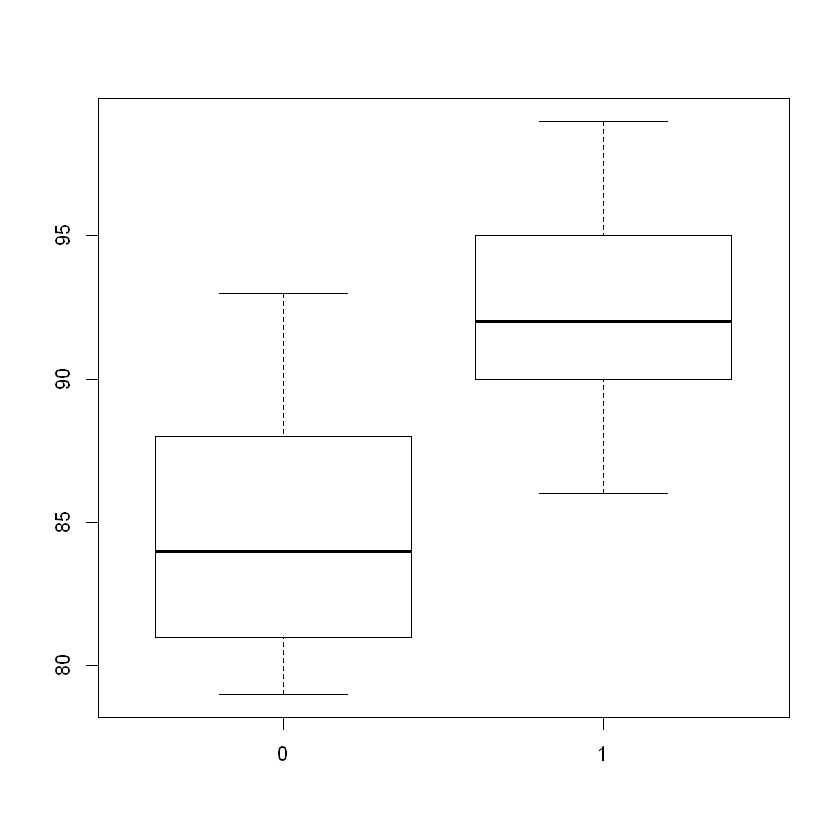

In [17]:
boxplot(Test1 ~ Group)

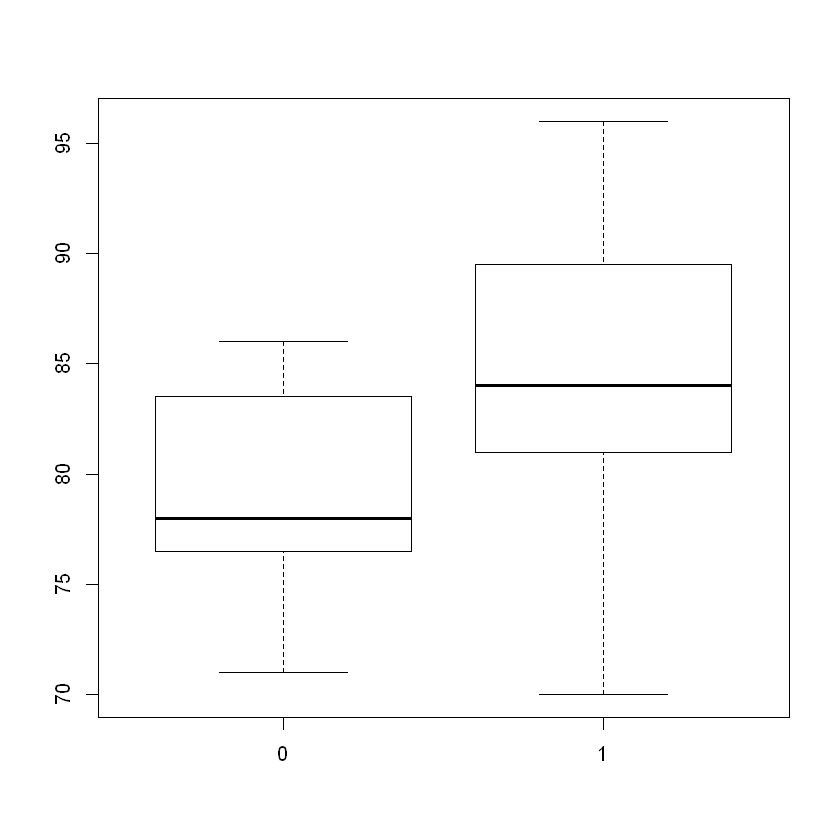

In [18]:
boxplot(Test2 ~ Group)

In [47]:
print(range(Test1))
print(range(Test2))

[1] 79 99
[1] 70 96


In [38]:
modelfit <- glm(Group ~ Test1, family = binomial)
xtest1 <- seq(75, 100, 1)
ytest1 <- predict(modelfit, list(Test1 = xtest1),type="response")

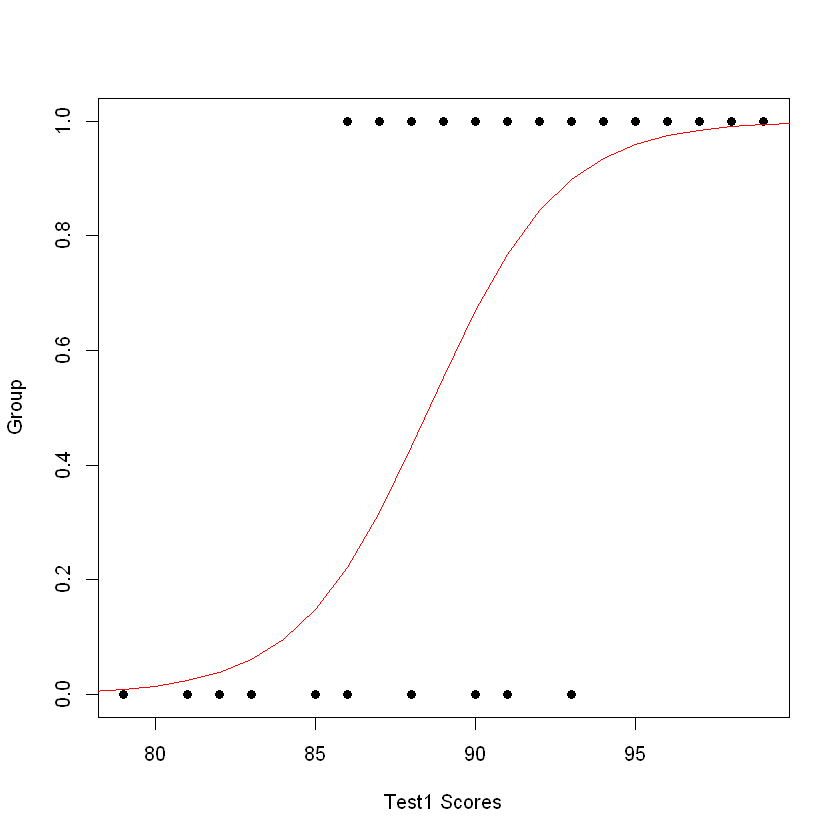

In [42]:
plot(Test1, Group, pch = 16, xlab = "Test1 Scores", ylab = "Group")
lines(xtest1, ytest1, col="red")

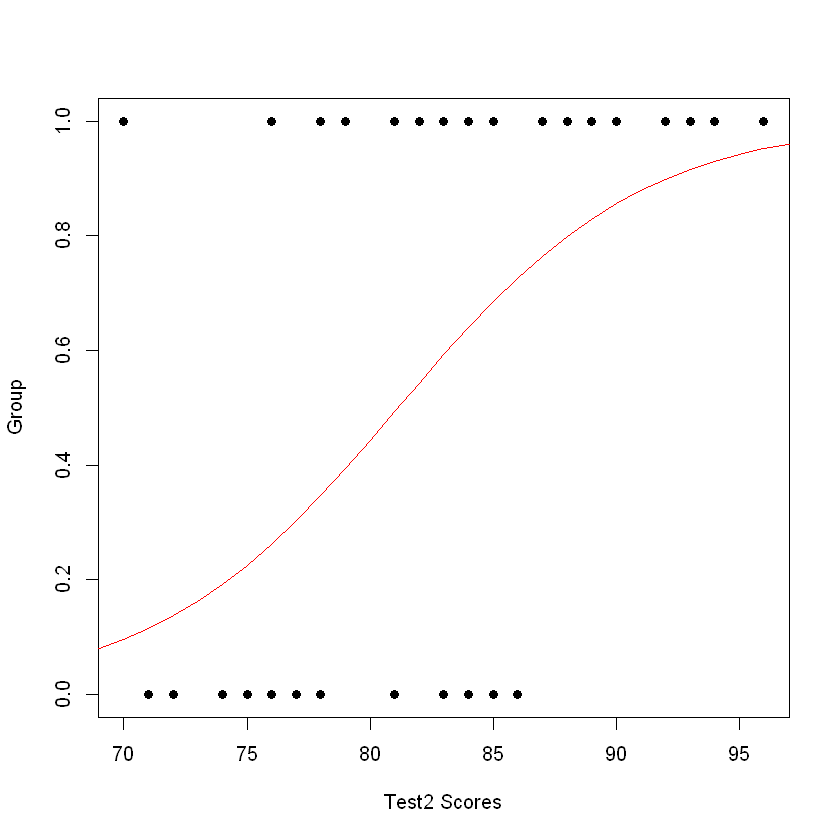

In [46]:
modelfit2 <- glm(Group ~ Test2, family = binomial)
xtest2 <- seq(65, 100, 1)
ytest2 <- predict(modelfit2, list(Test2 = xtest2),type="response")

plot(Test2, Group, pch = 16, xlab = "Test2 Scores", ylab = "Group")
lines(xtest2, ytest2, col="red")

In [ ]:
# C. Use the model to estimate the probability of success for employees who score:
# 93 on Test 1 and 84 on Test 2
# 93% probability an employee will be successful if they score a 93 on Test 1 and an 84 on Test 2, if in fact the sample reflects the 
# Y = 1

In [10]:
Xvalues <- data.frame(Test1 = 93,  Test2 = 84)
predict(modelfit, Xvalues, type = "response")

1 
0.9343895

In [ ]:
# 84 on Test 1 and 93 on Test 2
# 45% probability an employee will be successful if they score an 84 on Test1 and a 93 on Test2

In [11]:
Xvalues <- data.frame(Test1 = 84,  Test2 = 93)
predict(modelfit, Xvalues, type = "response")

1 
0.4485068

In [ ]:
detach(perform)